Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment ðŸŒ¯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [x] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [x] Begin with baselines for classification.
- [x] Use scikit-learn for logistic regression.
- [x] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [x] Get your model's test accuracy. (One time, at the end.)
- [x] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [x] Make exploratory visualizations.
- [x] Do one-hot encoding.
- [x] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [x] Get and plot your coefficients.
- [x] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [1]:
!pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
appnope==0.1.0
appscript==1.0.1
asn1crypto==1.0.1
astroid==2.3.1
astropy==4.0
atomicwrites==1.3.0
attr==0.3.1
attrs==19.2.0
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.5
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
Cartopy==0.17.0
category-encoders==2.1.0
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
click-plugins==1.1.1
cligj==0.5.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
conda==4.8.2
conda-build==3.18.9
conda-package-handling==1.6.0
conda-verify==3.4.2
confuse==1.0.0
contextlib2==0.6.0
cryptography==2.7
cycler==0.10.0
Cython==0.29.13
cytoolz==0.10.0
dask==2.5.2
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
distributed==2.5.2
docutils==0.15.2
entrypoints

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [3]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [4]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [5]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [6]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

## Data Exploration

In [7]:
df.head()

Burrito       Date  Yelp  Google Chips  Cost  Hunger  Mass (g)  \
0  California  1/18/2016   3.5     4.2   NaN  6.49     3.0       NaN   
1  California  1/24/2016   3.5     3.3   NaN  5.45     3.5       NaN   
2    Carnitas  1/24/2016   NaN     NaN   NaN  4.85     1.5       NaN   
3       Asada  1/24/2016   NaN     NaN   NaN  5.25     2.0       NaN   
4  California  1/27/2016   4.0     3.8     x  6.59     4.0       NaN   

   Density (g/mL)  Length  ...  Lobster  Queso  Egg  Mushroom  Bacon  Sushi  \
0             NaN     NaN  ...      NaN    NaN  NaN       NaN    NaN    NaN   
1             NaN     NaN  ...      NaN    NaN  NaN       NaN    NaN    NaN   
2             NaN     NaN  ...      NaN    NaN  NaN       NaN    NaN    NaN   
3             NaN     NaN  ...      NaN    NaN  NaN       NaN    NaN    NaN   
4             NaN     NaN  ...      NaN    NaN  NaN       NaN    NaN    NaN   

   Avocado  Corn  Zucchini  Great  
0      NaN   NaN       NaN  False  
1      NaN   NaN       NaN  False  
2      NaN   NaN       NaN  False  
3      NaN   NaN       NaN  False  
4      NaN   NaN       NaN   True  

[5 rows x 59 columns]

In [8]:
df.shape

(421, 59)

In [9]:
df.isnull().sum().sort_values(ascending = True)

Burrito             0
Tortilla            0
Great               0
Date                0
Synergy             2
Uniformity          2
Hunger              3
Wrap                3
Fillings            3
Cost                7
Meat:filling        9
Meat               14
Temp               20
Salsa              25
Length            138
Circum            140
Volume            140
Beef              242
Cheese            262
Pico              263
Guac              267
Fries             294
Sour cream        329
Yelp              334
Google            334
Pork              370
Sauce             383
Rice              385
Beans             386
Unreliable        388
Chips             395
Density (g/mL)    399
Mass (g)          399
Chicken           400
Shrimp            400
Onion             404
Cilantro          406
Avocado           408
Lettuce           410
Cabbage           413
Bell peper        414
Salsa.1           414
NonSD             414
Pineapple         414
Tomato            414
Fish      

In [10]:
df.describe(include = 'number')

Yelp     Google        Cost      Hunger    Mass (g)  \
count  87.000000  87.000000  414.000000  418.000000   22.000000   
mean    3.887356   4.167816    7.067343    3.495335  546.181818   
std     0.475396   0.373698    1.506742    0.812069  144.445619   
min     2.500000   2.900000    2.990000    0.500000  350.000000   
25%     3.500000   4.000000    6.250000    3.000000  450.000000   
50%     4.000000   4.200000    6.990000    3.500000  540.000000   
75%     4.000000   4.400000    7.880000    4.000000  595.000000   
max     4.500000   5.000000   25.000000    5.000000  925.000000   

       Density (g/mL)      Length      Circum      Volume    Tortilla  \
count       22.000000  283.000000  281.000000  281.000000  421.000000   
mean         0.675277   20.038233   22.135765    0.786477    3.519477   
std          0.080468    2.083518    1.779408    0.152531    0.794438   
min          0.560000   15.000000   17.000000    0.400000    1.000000   
25%          0.619485   18.500000   21.000000    0.680000    3.000000   
50%          0.658099   20.000000   22.000000    0.770000    3.500000   
75%          0.721726   21.500000   23.000000    0.880000    4.000000   
max          0.865672   26.000000   29.000000    1.540000    5.000000   

             Temp        Meat    Fillings  Meat:filling  Uniformity  \
count  401.000000  407.000000  418.000000    412.000000  419.000000   
mean     3.783042    3.620393    3.539833      3.586481    3.428998   
std      0.980338    0.829254    0.799549      0.997057    1.068794   
min      1.000000    1.000000    1.000000      0.500000    0.000000   
25%      3.000000    3.000000    3.000000      3.000000    2.600000   
50%      4.000000    3.800000    3.500000      4.000000    3.500000   
75%      4.500000    4.000000    4.000000      4.000000    4.000000   
max      5.000000    5.000000    5.000000      5.000000    5.000000   

            Salsa     Synergy        Wrap  Queso  
count  396.000000  419.000000  418.000000    0.0  
mean     3.371970    3.586993    3.979904    NaN  
std      0.924037    0.886807    1.118185    NaN  
min      0.000000    1.000000    0.000000    NaN  
25%      3.000000    3.000000    3.500000    NaN  
50%      3.500000    3.800000    4.000000    NaN  
75%      4.000000    4.000000    5.000000    NaN  
max      5.000000    5.000000    5.000000    NaN

In [11]:
df.describe(exclude = 'number')

Burrito       Date Chips Unreliable NonSD Beef Pico Guac Cheese  \
count          421        421    26         33     7  179  158  154    159   
unique           5        169     4          1     2    2    2    2      2   
top     California  8/30/2016     x          x     x    x    x    x      x   
freq           169         29    21         33     5  137  127  114    128   

       Fries  ... Nopales Lobster Egg Mushroom Bacon Sushi Avocado Corn  \
count    127  ...       4       1   5        3     3     2      13    3   
unique     2  ...       1       1   1        1     1     1       1    2   
top        x  ...       x       x   x        x     x     x       x    x   
freq     102  ...       4       1   5        3     3     2      13    2   

       Zucchini  Great  
count         1    421  
unique        1      2  
top           x  False  
freq          1    239  

[4 rows x 40 columns]

**Drop null values**
I will drop columns with na's over a certain threshold

In [12]:
thresh = len(df) * .2
thresh
#Came up with this number after doing some googling
#https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/3

84.2

In [13]:
df.dropna(thresh = thresh, axis = 1, inplace = True);

In [14]:
df.isnull().sum().sort_values(ascending = True)

Burrito           0
Tortilla          0
Great             0
Date              0
Synergy           2
Uniformity        2
Fillings          3
Hunger            3
Wrap              3
Cost              7
Meat:filling      9
Meat             14
Temp             20
Salsa            25
Length          138
Volume          140
Circum          140
Beef            242
Cheese          262
Pico            263
Guac            267
Fries           294
Sour cream      329
Yelp            334
Google          334
dtype: int64

## Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.

**Making sure 'Date' column is formatted correctly**

In [15]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)

In [16]:
df['Year'] = df['Date'].dt.year

In [17]:
df.head()

Burrito       Date  Yelp  Google  Cost  Hunger  Length  Circum  Volume  \
0  California 2016-01-18   3.5     4.2  6.49     3.0     NaN     NaN     NaN   
1  California 2016-01-24   3.5     3.3  5.45     3.5     NaN     NaN     NaN   
2    Carnitas 2016-01-24   NaN     NaN  4.85     1.5     NaN     NaN     NaN   
3       Asada 2016-01-24   NaN     NaN  5.25     2.0     NaN     NaN     NaN   
4  California 2016-01-27   4.0     3.8  6.59     4.0     NaN     NaN     NaN   

   Tortilla  ...  Synergy  Wrap  Beef  Pico  Guac  Cheese  Fries  Sour cream  \
0       3.0  ...      4.0   4.0     x     x     x       x      x         NaN   
1       2.0  ...      2.5   5.0     x     x     x       x      x         NaN   
2       3.0  ...      3.0   5.0   NaN     x     x     NaN    NaN         NaN   
3       3.0  ...      4.0   5.0     x     x     x     NaN    NaN         NaN   
4       4.0  ...      4.5   4.0     x     x   NaN       x      x         NaN   

   Great  Year  
0  False  2016  
1  False  2016  
2  False  2016  
3  False  2016  
4   True  2016  

[5 rows x 26 columns]

**Splitting data into train/val/test**

In [18]:
train = df[df['Year'] < 2017]
val = df[df['Year'] == 2017] 
test = df[df['Year'] > 2017]

In [19]:
train.columns

Index(['Burrito', 'Date', 'Yelp', 'Google', 'Cost', 'Hunger', 'Length',
       'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Beef',
       'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream', 'Great', 'Year'],
      dtype='object')

In [20]:
train.shape, val.shape, test.shape

((298, 26), (85, 26), (38, 26))

In [21]:
print( 'Train: \n', min(train['Date']),'\n', max(train['Date']),'\n','Val: \n', min(val['Date']), '\n', max(val['Date']), '\n', 'Test: \n', min(test['Date']), '\n', max(test['Date']))

Train: 
 2011-05-16 00:00:00 
 2016-12-15 00:00:00 
 Val: 
 2017-01-04 00:00:00 
 2017-12-29 00:00:00 
 Test: 
 2018-01-02 00:00:00 
 2026-04-25 00:00:00


##  Begin with baselines for classification.

**Determine majority class**

In [22]:
target = 'Great'
y_train = train[target]
y_train.value_counts()

False    176
True     122
Name: Great, dtype: int64

**What if we guessed the majority class for every prediction?**

In [23]:
majority_class = y_train.mode()[0]
y_pred_train = [majority_class] * len(y_train)

**Sklearn Accuracy Score**

In [24]:
from sklearn.metrics import accuracy_score

**Train**

In [25]:
accuracy_score(y_train, y_pred_train)

0.5906040268456376

If we guessed the majority class we would get ~59% accuracy

**Validation**

In [26]:
y_val = val[target]
y_pred = [majority_class]*len(y_val)
accuracy_score(y_val, y_pred)

0.5529411764705883

If we guessed the majority class we would get ~55% accuracy

## Exploratory Visuals

Burrito      Great
Asada        False    0.600000
             True     0.400000
California   False    0.500000
             True     0.500000
Carnitas     False    0.642857
             True     0.357143
Other        False    0.654545
             True     0.345455
Surf & Turf  False    0.714286
             True     0.285714
Name: Great, dtype: float64 



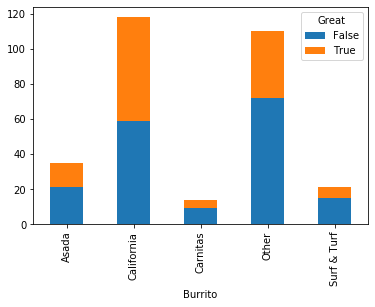



Tortilla  Great
1.40      False    1.000000
1.50      False    0.833333
          True     0.166667
2.00      False    0.857143
          True     0.142857
2.10      False    1.000000
2.50      False    1.000000
2.80      False    1.000000
3.00      False    0.680556
          True     0.319444
3.20      True     1.000000
3.50      False    0.777778
          True     0.222222
3.60      False    1.000000
3.75      False    1.000000
3.80      True     0.800000
          False    0.200000
4.00      True     0.619565
          False    0.380435
4.50      True     0.526316
          False    0.473684
4.80      True     1.000000
5.00      True     0.800000
          False    0.200000
Name: Great, dtype: float64 



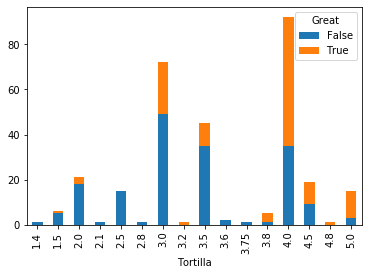



Synergy  Great
1.00     False    1.000000
1.50     False    1.000000
2.00     False    1.000000
2.30     False    1.000000
2.50     False    1.000000
2.70     False    1.000000
2.80     False    1.000000
2.90     False    1.000000
3.00     False    0.857143
         True     0.142857
3.30     False    1.000000
3.40     False    1.000000
3.50     False    0.750000
         True     0.250000
3.70     False    1.000000
3.75     False    1.000000
3.80     False    1.000000
4.00     True     0.592593
         False    0.407407
4.20     True     1.000000
4.30     True     1.000000
4.40     True     1.000000
4.50     True     0.848485
         False    0.151515
4.70     True     1.000000
4.90     True     1.000000
5.00     True     1.000000
Name: Great, dtype: float64 



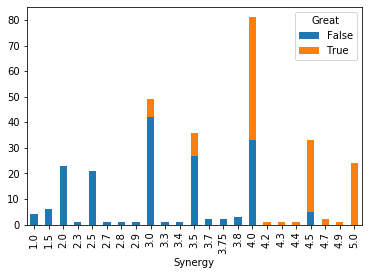



Uniformity  Great
1.0         False    0.916667
            True     0.083333
1.5         False    0.900000
            True     0.100000
1.6         False    1.000000
2.0         False    0.729730
            True     0.270270
2.2         True     1.000000
2.3         False    1.000000
2.4         False    1.000000
2.5         False    0.750000
            True     0.250000
2.7         False    1.000000
3.0         False    0.736842
            True     0.263158
3.2         False    1.000000
3.5         False    0.636364
            True     0.363636
4.0         True     0.550000
            False    0.450000
4.2         True     1.000000
4.3         False    1.000000
4.4         True     1.000000
4.5         True     0.566667
            False    0.433333
5.0         True     0.633333
            False    0.366667
Name: Great, dtype: float64 



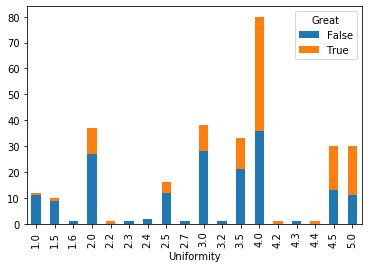



Hunger  Great
0.50    False    1.000000
1.00    False    0.666667
        True     0.333333
1.50    False    1.000000
2.00    False    0.619048
        True     0.380952
2.20    False    1.000000
2.30    False    1.000000
2.50    False    0.611111
        True     0.388889
2.80    True     1.000000
3.00    False    0.694915
        True     0.305085
3.20    False    1.000000
3.50    False    0.625000
        True     0.375000
3.70    False    0.500000
        True     0.500000
3.75    False    1.000000
3.80    True     1.000000
3.90    False    1.000000
4.00    False    0.529412
        True     0.470588
4.10    True     1.000000
4.25    False    1.000000
4.30    True     1.000000
4.50    True     0.562500
        False    0.437500
4.75    False    1.000000
5.00    True     0.625000
        False    0.375000
Name: Great, dtype: float64 



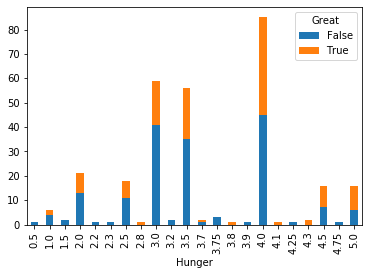



Wrap  Great
0.0   False    1.000000
0.5   False    1.000000
1.0   False    0.875000
      True     0.125000
1.2   False    1.000000
1.5   False    0.625000
      True     0.375000
2.0   False    0.583333
      True     0.416667
2.2   True     1.000000
2.5   False    0.800000
      True     0.200000
2.6   False    1.000000
3.0   False    0.600000
      True     0.400000
3.5   False    0.833333
      True     0.166667
3.8   True     1.000000
3.9   False    1.000000
4.0   False    0.500000
      True     0.500000
4.5   False    0.591837
      True     0.408163
5.0   False    0.551020
      True     0.448980
Name: Great, dtype: float64 



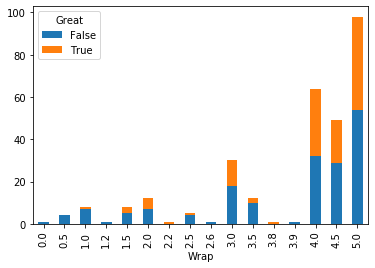



Fillings  Great
1.00      False    1.000000
1.50      False    1.000000
2.00      False    1.000000
2.40      False    1.000000
2.50      False    0.888889
          True     0.111111
2.75      False    1.000000
2.80      False    0.750000
          True     0.250000
3.00      False    0.878788
          True     0.121212
3.20      False    1.000000
3.30      False    1.000000
3.40      False    1.000000
3.50      False    0.666667
          True     0.333333
4.00      True     0.604938
          False    0.395062
4.20      True     1.000000
4.30      True     1.000000
4.40      True     1.000000
4.50      True     0.761905
          False    0.238095
4.70      False    0.500000
          True     0.500000
5.00      True     1.000000
Name: Great, dtype: float64 



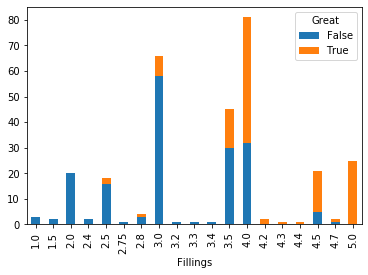



Cost   Great
2.99   True     1.0
3.50   False    1.0
3.75   False    1.0
3.99   False    1.0
4.59   True     1.0
               ... 
9.50   False    1.0
9.99   True     1.0
10.50  False    1.0
11.75  True     1.0
11.95  True     1.0
Name: Great, Length: 109, dtype: float64 



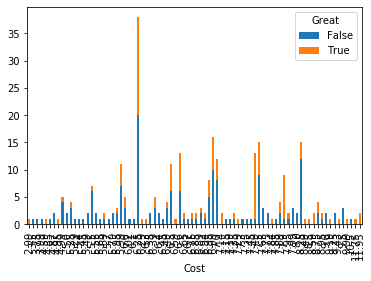



Meat:filling  Great
0.50          False    1.000000
1.00          False    0.888889
              True     0.111111
1.40          False    1.000000
1.50          False    1.000000
2.00          False    1.000000
2.50          False    0.888889
              True     0.111111
2.80          False    1.000000
2.90          False    1.000000
3.00          False    0.743590
              True     0.256410
3.20          True     1.000000
3.40          False    1.000000
3.50          False    0.593750
              True     0.406250
3.60          False    1.000000
3.70          False    1.000000
3.75          False    0.666667
              True     0.333333
3.78          True     1.000000
3.80          False    1.000000
4.00          True     0.518072
              False    0.481928
4.20          False    1.000000
4.50          True     0.633333
              False    0.366667
4.70          True     1.000000
4.80          False    1.000000
5.00          True     0.781250
              Fals

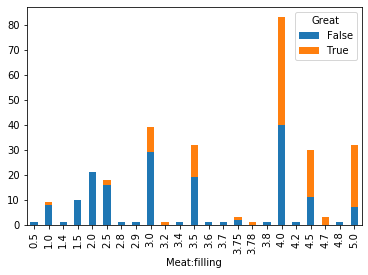



Meat  Great
1.00  False    1.000000
1.50  False    1.000000
2.00  False    1.000000
2.50  False    0.937500
      True     0.062500
2.60  False    1.000000
2.70  False    1.000000
2.75  False    1.000000
2.80  False    1.000000
3.00  False    0.901961
      True     0.098039
3.20  False    1.000000
3.30  False    1.000000
3.50  False    0.723404
      True     0.276596
3.70  False    1.000000
3.75  False    1.000000
3.80  False    1.000000
4.00  True     0.666667
      False    0.333333
4.20  True     1.000000
4.50  True     0.800000
      False    0.200000
4.70  True     1.000000
5.00  True     0.800000
      False    0.200000
Name: Great, dtype: float64 



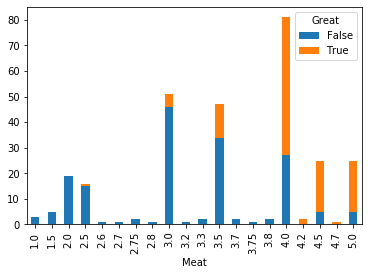



Temp  Great
1.0   False    1.000000
1.3   False    1.000000
1.5   False    1.000000
1.9   False    1.000000
2.0   False    0.550000
      True     0.450000
2.5   False    0.920000
      True     0.080000
3.0   False    0.850000
      True     0.150000
3.2   False    1.000000
3.5   False    0.600000
      True     0.400000
3.6   True     1.000000
3.7   False    1.000000
3.8   True     0.666667
      False    0.333333
4.0   False    0.500000
      True     0.500000
4.4   True     1.000000
4.5   False    0.514286
      True     0.485714
4.7   True     1.000000
5.0   True     0.568627
      False    0.431373
Name: Great, dtype: float64 



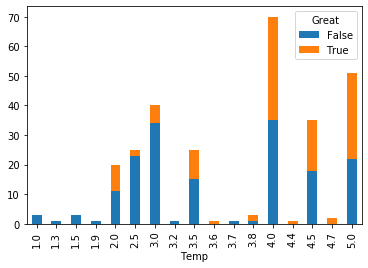



Salsa  Great
0.00   False    1.000000
0.50   False    1.000000
1.00   False    1.000000
1.50   False    1.000000
1.80   True     1.000000
2.00   False    0.827586
       True     0.172414
2.20   False    1.000000
2.50   False    0.777778
       True     0.222222
2.75   False    1.000000
3.00   False    0.706897
       True     0.293103
3.20   False    1.000000
3.50   False    0.666667
       True     0.333333
3.70   True     1.000000
3.75   False    1.000000
3.80   False    1.000000
4.00   True     0.553571
       False    0.446429
4.20   True     1.000000
4.30   True     1.000000
4.50   True     0.720000
       False    0.280000
4.75   True     1.000000
5.00   True     0.777778
       False    0.222222
Name: Great, dtype: float64 



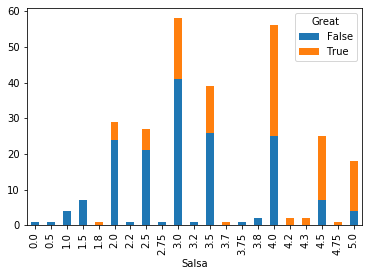



Length  Great
15.00   False    1.000000
15.50   True     1.000000
16.00   False    1.000000
16.50   False    0.600000
        True     0.400000
17.00   False    0.666667
        True     0.333333
17.50   False    0.571429
        True     0.428571
17.70   True     1.000000
17.78   False    1.000000
18.00   False    0.687500
        True     0.312500
18.50   False    0.625000
        True     0.375000
19.00   False    0.526316
        True     0.473684
19.50   False    0.846154
        True     0.153846
20.00   False    0.650000
        True     0.350000
20.50   False    0.692308
        True     0.307692
20.75   False    1.000000
21.00   False    0.625000
        True     0.375000
21.50   False    0.714286
        True     0.285714
22.00   True     0.700000
        False    0.300000
22.50   True     0.555556
        False    0.444444
23.00   True     0.666667
        False    0.333333
23.50   False    0.666667
        True     0.333333
24.00   False    1.000000
25.00   False    1.000

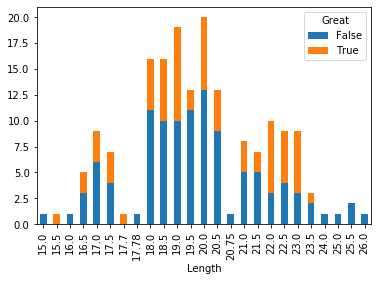



Circum  Great
17.000  False    1.000000
18.000  False    1.000000
18.500  False    1.000000
19.000  False    0.666667
        True     0.333333
19.500  False    0.750000
        True     0.250000
20.000  False    0.714286
        True     0.285714
20.500  False    0.846154
        True     0.153846
20.800  False    1.000000
21.000  True     0.526316
        False    0.473684
21.200  True     1.000000
21.500  False    0.588235
        True     0.411765
21.750  False    1.000000
22.000  False    0.517241
        True     0.482759
22.125  False    1.000000
22.225  False    1.000000
22.500  False    0.818182
        True     0.181818
22.750  True     1.000000
23.000  False    0.533333
        True     0.466667
23.500  True     0.600000
        False    0.400000
24.000  True     0.571429
        False    0.428571
24.500  False    1.000000
25.000  False    0.500000
        True     0.500000
25.500  False    1.000000
26.000  True     1.000000
26.500  False    1.000000
27.000  False    1.000

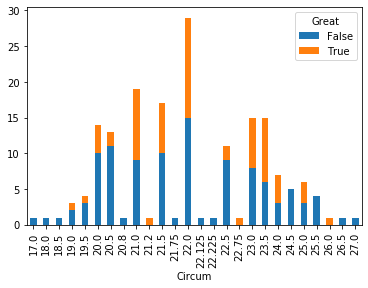



Volume  Great
0.40    False    1.0
0.50    False    1.0
0.51    False    1.0
0.54    False    0.5
        True     0.5
                ... 
1.05    True     1.0
1.07    False    1.0
1.16    False    1.0
1.17    False    1.0
1.24    False    1.0
Name: Great, Length: 78, dtype: float64 



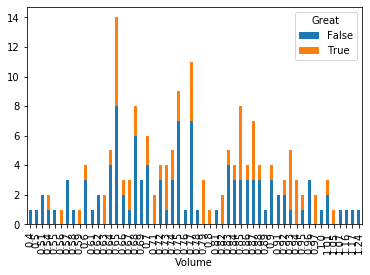

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['Burrito','Tortilla','Synergy','Uniformity', 
        'Hunger','Wrap','Fillings','Cost','Meat:filling', 
        'Meat','Temp','Salsa','Length','Circum','Volume']

for feature in features:

  #Looking at features against target
  compare = train.groupby(feature)['Great'].value_counts(normalize=True)
  print(compare, '\n')

  #Creating graph to visualize how categorical data against functional target
  train.groupby(feature)['Great'].value_counts().unstack().plot(kind='bar', stacked=True);
  plt.xticks(rotation=90);
  plt.show();

  print('\n')

In [28]:
train.corr()

Yelp    Google      Cost    Hunger    Length    Circum  \
Yelp          1.000000  0.585133  0.013569  0.109067  0.397478  0.065553   
Google        0.585133  1.000000 -0.001470  0.138669  0.160693  0.151752   
Cost          0.013569 -0.001470  1.000000  0.002414 -0.079064  0.403674   
Hunger        0.109067  0.138669  0.002414  1.000000  0.118518 -0.158323   
Length        0.397478  0.160693 -0.079064  0.118518  1.000000 -0.067762   
Circum        0.065553  0.151752  0.403674 -0.158323 -0.067762  1.000000   
Volume        0.325606  0.223473  0.302008 -0.073466  0.527826  0.806687   
Tortilla      0.274195  0.326674 -0.049891  0.146126  0.165723  0.048642   
Temp         -0.000352 -0.094125 -0.083887  0.087378 -0.067528 -0.186784   
Meat          0.078049  0.058849  0.168506  0.081790 -0.054290  0.158569   
Fillings      0.286679  0.332585  0.185456  0.183629  0.109499  0.124948   
Meat:filling  0.005976  0.154295 -0.076590  0.121039 -0.038337 -0.028323   
Uniformity   -0.072920 -0.054090 -0.106477  0.094913  0.045785 -0.029974   
Salsa         0.189677  0.265229  0.150133  0.133990  0.041607  0.102384   
Synergy       0.272944  0.269943  0.050917  0.168491  0.071656  0.068080   
Wrap         -0.059679 -0.024867 -0.163589  0.012002  0.040159 -0.175470   
Great         0.205121  0.159915  0.142365  0.158043  0.045870  0.067621   
Year               NaN       NaN -0.053477 -0.044626       NaN       NaN   

                Volume  Tortilla      Temp      Meat  Fillings  Meat:filling  \
Yelp          0.325606  0.274195 -0.000352  0.078049  0.286679      0.005976   
Google        0.223473  0.326674 -0.094125  0.058849  0.332585      0.154295   
Cost          0.302008 -0.049891 -0.083887  0.168506  0.185456     -0.076590   
Hunger       -0.073466  0.146126  0.087378  0.081790  0.183629      0.121039   
Length        0.527826  0.165723 -0.067528 -0.054290  0.109499     -0.038337   
Circum        0.806687  0.048642 -0.186784  0.158569  0.124948     -0.028323   
Volume        1.000000  0.135366 -0.195904  0.101055  0.167131     -0.053833   
Tortilla      0.135366  1.000000  0.287502  0.282051  0.375572      0.244356   
Temp         -0.195904  0.287502  1.000000  0.246524  0.199128      0.173743   
Meat          0.101055  0.282051  0.246524  1.000000  0.591808      0.388833   
Fillings      0.167131  0.375572  0.199128  0.591808  1.000000      0.360036   
Meat:filling -0.053833  0.244356  0.173743  0.388833  0.360036      1.000000   
Uniformity   -0.002003  0.245504  0.163125  0.255857  0.245850      0.507143   
Salsa         0.097130  0.280748  0.116437  0.376505  0.391660      0.269630   
Synergy       0.091221  0.353218  0.215297  0.615289  0.699861      0.515032   
Wrap         -0.135104  0.164170  0.152208  0.065596  0.083638      0.251344   
Great         0.072906  0.377766  0.290867  0.572249  0.591670      0.462284   
Year               NaN  0.011925       NaN  0.084178  0.014970      0.068373   

              Uniformity     Salsa   Synergy      Wrap     Great      Year  
Yelp           -0.072920  0.189677  0.272944 -0.059679  0.205121       NaN  
Google         -0.054090  0.265229  0.269943 -0.024867  0.159915       NaN  
Cost           -0.106477  0.150133  0.050917 -0.163589  0.142365 -0.053477  
Hunger          0.094913  0.133990  0.168491  0.012002  0.158043 -0.044626  
Length          0.045785  0.041607  0.071656  0.040159  0.045870       NaN  
Circum         -0.029974  0.102384  0.068080 -0.175470  0.067621       NaN  
Volume         -0.002003  0.097130  0.091221 -0.135104  0.072906       NaN  
Tortilla        0.245504  0.280748  0.353218  0.164170  0.377766  0.011925  
Temp            0.163125  0.116437  0.215297  0.152208  0.290867       NaN  
Meat            0.255857  0.376505  0.615289  0.065596  0.572249  0.084178  
Fillings        0.245850  0.391660  0.699861  0.083638  0.591670  0.014970  
Meat:filling    0.507143  0.269630  0.515032  0.251344  0.462284  0.068373  
Uniformity      1.000000  0.297854  0.356924  0.184

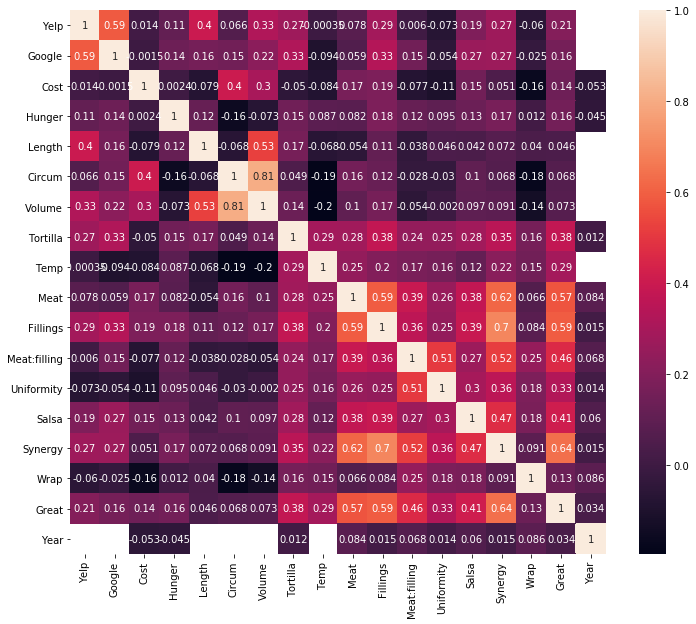

In [29]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(data = train.corr(), annot=True)

#https://github.com/mwaskom/seaborn/issues/1773
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();

## Creating Function to Apply Feature Engineering

In [30]:
def engineer_features(X):
    #Avoid SettingWithCopyWarning
    X = X.copy()
    
    #Replace x's with 1 and NaNs with 0
    #Making an assumption that NaNs for the fillings are 0 and 
    #that the x's are meant to meant that these items were included. 
    cols = ['Salsa', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream']
    X[cols] = X[cols].fillna(0)
    X[cols] = X[cols].replace('x', '1')
    
    #Replace Yelp and Google reviews with averages 
    X = X.drop(columns = ['Yelp', 'Google', 'Year'])
    
    #Replacing Circumference, Volume, and Length with the averages basead on the type of Burrito
    X['Circum'] = X.groupby('Burrito')['Circum'].transform(lambda x: x.fillna(x.mean()))
    X['Volume'] = X.groupby('Burrito')['Volume'].transform(lambda x: x.fillna(x.mean()))
    X['Length'] = X.groupby('Burrito')['Length'].transform(lambda x: x.fillna(x.mean()))
    
    #Return the dataframe
    return X

train = engineer_features(train)
val = engineer_features(val)
test = engineer_features(test)

In [31]:
print(train.shape)
train.head(10)

(298, 23)


Burrito       Date  Cost  Hunger     Length     Circum    Volume  \
0  California 2016-01-18  6.49     3.0  19.969737  22.242434  0.786842   
1  California 2016-01-24  5.45     3.5  19.969737  22.242434  0.786842   
2    Carnitas 2016-01-24  4.85     1.5  19.000000  21.500000  0.701250   
3       Asada 2016-01-24  5.25     2.0  19.717391  21.113636  0.708182   
4  California 2016-01-27  6.59     4.0  19.969737  22.242434  0.786842   
5       Other 2016-01-28  6.99     4.0  19.777321  21.922768  0.762679   
6  California 2016-01-30  7.19     1.5  19.969737  22.242434  0.786842   
7    Carnitas 2016-01-30  6.99     4.0  19.000000  21.500000  0.701250   
8  California 2016-02-01  9.25     3.5  19.969737  22.242434  0.786842   
9       Asada 2016-02-06  6.25     3.5  19.717391  21.113636  0.708182   

   Tortilla  Temp  Meat  ...  Salsa  Synergy  Wrap  Beef  Pico  Guac Cheese  \
0       3.0   5.0   3.0  ...    4.0      4.0   4.0     1     1     1      1   
1       2.0   3.5   2.5  ...    3.5      2.5   5.0     1     1     1      1   
2       3.0   2.0   2.5  ...    3.0      3.0   5.0     0     1     1      0   
3       3.0   2.0   3.5  ...    4.0      4.0   5.0     1     1     1      0   
4       4.0   5.0   4.0  ...    2.5      4.5   4.0     1     1     0      1   
5       3.0   4.0   5.0  ...    2.5      4.0   1.0     0     0     1      1   
6       2.0   3.0   3.0  ...    0.0      2.0   3.0     1     0     0      1   
7       2.5   3.0   3.0  ...    0.0      2.5   3.0     0     1     1      0   
8       2.0   4.5   4.5  ...    3.5      4.0   2.0     1     1     1      1   
9       2.5   1.5   1.5  ...    1.5      2.0   4.5     1     1     1      0   

  Fries Sour cream  Great  
0     1          0  False  
1     1          0  False  
2     0          0  False  
3     0          0  False  
4     1          0   True  
5     0          1  False  
6     1          1  False  
7     0          0  False  
8     1          1  False  
9     0          0  False  

[10 rows x 23 columns]

In [32]:
train.isnull().sum()

Burrito          0
Date             0
Cost             6
Hunger           1
Length           0
Circum           0
Volume           0
Tortilla         0
Temp            15
Meat            10
Fillings         1
Meat:filling     6
Uniformity       2
Salsa            0
Synergy          2
Wrap             2
Beef             0
Pico             0
Guac             0
Cheese           0
Fries            0
Sour cream       0
Great            0
dtype: int64

## Use scikit-learn for logistic regression.

In [33]:
target = 'Great'
features = ['Tortilla', 'Temp', 'Meat', 'Fillings',
            'Salsa', 'Synergy', 'Wrap', 'Cost', 'Meat:filling']

In [34]:
#1 Import the estimator class
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#2 Instantiate the class
log_reg = LogisticRegression(random_state=42)

#3 Arrange X feautre matrices and y target vectors
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

# OneHotEncoding
encoder = ce.one_hot.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Imputing missing values
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

#4 Fit the model
log_reg.fit(X_train_scaled, y_train)


/Users/jisha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Get your model's validation accuracy. (Multiple times if you try multiple iterations.)

In [35]:
#5 Apply the model to new data.
y_pred = log_reg.predict(X_val_scaled)
print('Validation Accuracy', accuracy_score(y_pred, y_val))
print('Validation Accuracy', log_reg.score(X_val_scaled, y_val))

Validation Accuracy 0.8352941176470589
Validation Accuracy 0.8352941176470589


**Plot coefficients**

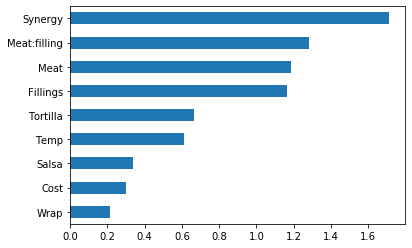

In [36]:
coefficients = pd.Series(log_reg.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

## Get your model's test accuracy. (One time, at the end.)

In [37]:
X_test = test[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

In [39]:
y_test = test[target]

In [40]:
y_pred_test = log_reg.predict(X_test_scaled)
print('Validation Accuracy', accuracy_score(y_pred_test, y_test))
print('Validation Accuracy', log_reg.score(X_test_scaled, y_test))

Validation Accuracy 0.7631578947368421
Validation Accuracy 0.7631578947368421


## Scikit-learn Pipeline

In [42]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    LogisticRegression()
)

#Fit on train
pipeline.fit(X_train, y_train)

#Score on train/val
print('Training Accuracy', pipeline.score(X_train, y_train))

#Predict on Test Data
y_pred = pipeline.predict(X_test)
print('Testing Accuracy', pipeline.score(X_test, y_test))

Training Accuracy 0.8322147651006712
Testing Accuracy 0.7105263157894737


/Users/jisha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Kaggle Submission

In [43]:
submission = test[['Burrito']].copy()
submission

Burrito
77    California
386   California
387        Other
388   California
389        Other
390        Asada
391     Carnitas
392     Carnitas
393     Carnitas
394   California
395   California
396        Other
397        Other
398     Carnitas
399     Carnitas
400   California
401  Surf & Turf
402   California
403   California
404   California
405     Carnitas
406     Carnitas
407        Other
408        Other
409        Other
410        Other
411        Other
412   California
413   California
414        Other
415        Asada
416        Other
417   California
418        Other
419        Other
420   California
421        Other
422        Other

In [44]:
submission['Great'] = y_pred_test
submission

Burrito  Great
77    California   True
386   California   True
387        Other  False
388   California   True
389        Other  False
390        Asada  False
391     Carnitas   True
392     Carnitas   True
393     Carnitas   True
394   California   True
395   California  False
396        Other  False
397        Other   True
398     Carnitas  False
399     Carnitas   True
400   California   True
401  Surf & Turf   True
402   California  False
403   California  False
404   California  False
405     Carnitas  False
406     Carnitas   True
407        Other  False
408        Other   True
409        Other   True
410        Other  False
411        Other  False
412   California   True
413   California   True
414        Other   True
415        Asada  False
416        Other   True
417   California   True
418        Other  False
419        Other   True
420   California   True
421        Other   True
422        Other   True

In [45]:
submission.to_csv('my_submission.csv', index = False)